In [30]:
import pandas as pd

data = pd.read_csv("data-turbine/gt_full.csv", index_col=0)

data

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
1      4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
2      4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
3      3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
4      3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
5      3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
36729  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411   
36730  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344   
36731  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462   
36732  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771   
36733  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.462   

             CO      NOX  
1       0.32663   81.952  
2       0.44784   82.377  
3       0.45144   83.776  
4       0.23107   82.505  
5       0.26747   82.028  
...         ...      ...  
36729  10.99300   89.172  
36730  11.14400   88.849  
36731  11.41400   96.147  
36732   3.31340   64.738  
36733  11.98100  109.240  

[36733 rows x 11 columns]

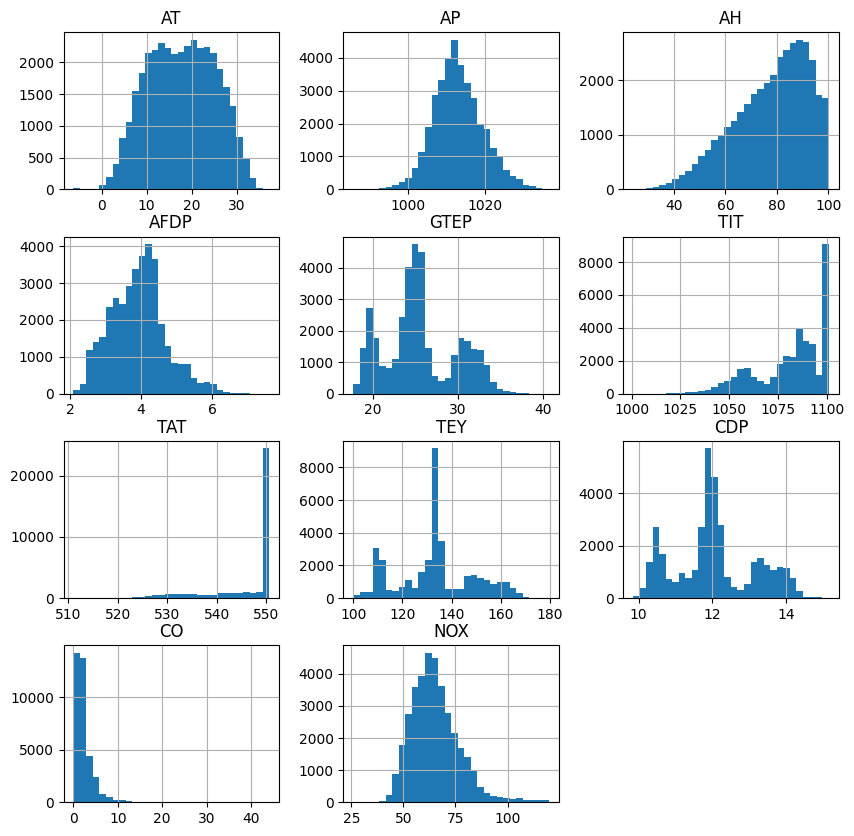

In [31]:
import matplotlib.pyplot as plt

data.hist(bins=30, figsize=(10, 10))
plt.show()

In [32]:
data.describe().transpose()

count         mean        std          min        25%        50%  \
AT    36733.0    17.712726   7.447451    -6.234800    11.7810    17.8010   
AP    36733.0  1013.070165   6.463346   985.850000  1008.8000  1012.6000   
AH    36733.0    77.867015  14.461355    24.085000    68.1880    80.4700   
AFDP  36733.0     3.925518   0.773936     2.087400     3.3556     3.9377   
GTEP  36733.0    25.563801   4.195957    17.698000    23.1290    25.1040   
TIT   36733.0  1081.428084  17.536373  1000.800000  1071.8000  1085.9000   
TAT   36733.0   546.158517   6.842360   511.040000   544.7200   549.8800   
TEY   36733.0   133.506404  15.618634   100.020000   124.4500   133.7300   
CDP   36733.0    12.060525   1.088795     9.851800    11.4350    11.9650   
CO    36733.0     2.372468   2.262672     0.000388     1.1824     1.7135   
NOX   36733.0    65.293067  11.678357    25.905000    57.1620    63.8490   

            75%        max  
AT      23.6650    37.1030  
AP    1017.0000  1036.6000  
AH      89.3760   100.2000  
AFDP     4.3769     7.6106  
GTEP    29.0610    40.7160  
TIT   1097.0000  1100.9000  
TAT    550.0400   550.6100  
TEY    144.0800   179.5000  
CDP     12.8550    15.1590  
CO       2.8429    44.1030  
NOX     71.5480   119.9100

<Axes: >

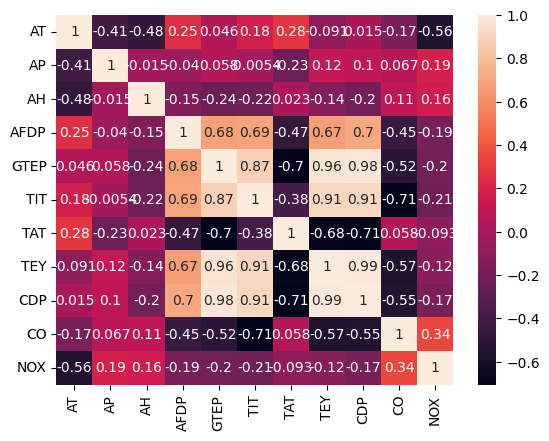

In [33]:
import seaborn as sns

sns.heatmap(data.corr(), annot=True)

In [34]:
data.drop(["AT", "AP", "AFDP", "GTEP", "TEY", "CDP", "NOX"], axis=1, inplace=True)
data

AH     TIT     TAT        CO
1      83.675  1086.2  549.83   0.32663
2      84.235  1086.1  550.05   0.44784
3      84.858  1086.5  550.19   0.45144
4      85.434  1086.5  550.17   0.23107
5      85.182  1085.9  550.00   0.26747
...       ...     ...     ...       ...
36729  93.200  1037.0  541.59  10.99300
36730  94.036  1037.6  542.28  11.14400
36731  95.219  1038.0  543.48  11.41400
36732  94.200  1076.9  550.11   3.31340
36733  94.547  1067.9  548.23  11.98100

[36733 rows x 4 columns]

<Axes: >

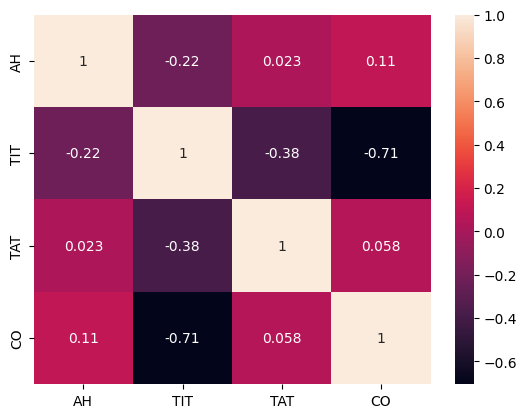

In [35]:
sns.heatmap(data.corr(), annot=True)

In [36]:
from sklearn.model_selection import train_test_split

random_state = 9

y = data["CO"]
X = data.drop(["CO"], axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state
)
display(X_train, y_train, X_test, y_test)

AH     TIT     TAT
4481   83.256  1100.0  540.65
24884  73.583  1099.8  538.53
21558  81.089  1100.0  534.04
1706   64.757  1086.6  549.76
21389  75.645  1100.0  534.21
...       ...     ...     ...
25726  85.663  1072.2  549.82
5015   75.280  1058.0  549.86
22585  92.874  1067.2  550.15
502    93.029  1099.9  524.78
20829  88.840  1079.9  550.02

[29386 rows x 3 columns]

4481     0.3527
24884    1.2522
21558    1.4718
1706     1.3117
21389    1.7835
          ...  
25726    2.4980
5015     3.2652
22585    1.2630
502      0.7851
20829    2.7272
Name: CO, Length: 29386, dtype: float64

AH     TIT     TAT
18247  84.837  1088.7  550.39
20344  59.574  1100.0  542.01
2925   81.262  1092.9  544.91
118    88.135  1100.0  526.21
5714   86.846  1080.2  550.25
...       ...     ...     ...
21918  75.935  1081.1  549.66
13100  78.314  1089.8  550.37
26705  79.478  1073.0  550.19
4183   41.623  1100.2  539.10
2983   69.233  1091.6  549.98

[7347 rows x 3 columns]

18247    1.34970
20344    1.63430
2925     0.78632
118      0.72742
5714     1.35980
          ...   
21918    1.45140
13100    1.00960
26705    2.01190
4183     0.37685
2983     1.15990
Name: CO, Length: 7347, dtype: float64

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, tree, neighbors, ensemble

models = {
    "linear": {"model": linear_model.LinearRegression(n_jobs=-1)},
    "linear_poly": {
        "model": make_pipeline(
            PolynomialFeatures(degree=2),
            linear_model.LinearRegression(fit_intercept=False, n_jobs=-1),
        )
    },
    "linear_interact": {
        "model": make_pipeline(
            PolynomialFeatures(interaction_only=True),
            linear_model.LinearRegression(fit_intercept=False, n_jobs=-1),
        )
    },
    "ridge": {"model": linear_model.RidgeCV()},
    "decision_tree": {
        "model": tree.DecisionTreeRegressor(max_depth=4, random_state=random_state)
    },
    "knn": {"model": neighbors.KNeighborsRegressor(n_neighbors=7, n_jobs=-1)},
    "random_forest": {
        "model": ensemble.RandomForestRegressor(
            max_depth=7, random_state=random_state, n_jobs=-1
        )
    },
}

In [38]:
import math
from sklearn import metrics

for model_name in models.keys():
    print(f"Model: {model_name}")
    fitted_model = models[model_name]["model"].fit(
        X_train.values, y_train.values.ravel()
    )
    y_train_pred = fitted_model.predict(X_train.values)
    y_test_pred = fitted_model.predict(X_test.values)
    models[model_name]["fitted"] = fitted_model
    models[model_name]["train_preds"] = y_train_pred
    models[model_name]["preds"] = y_test_pred
    models[model_name]["RMSE_train"] = math.sqrt(
        metrics.mean_squared_error(y_train, y_train_pred)
    )
    models[model_name]["RMSE_test"] = math.sqrt(
        metrics.mean_squared_error(y_test, y_test_pred)
    )
    models[model_name]["RMAE_test"] = math.sqrt(
        metrics.mean_absolute_error(y_test, y_test_pred)
    )
    models[model_name]["R2_test"] = metrics.r2_score(y_test, y_test_pred)

Model: linear
Model: linear_poly
Model: linear_interact
Model: ridge
Model: decision_tree
Model: knn
Model: random_forest


In [39]:
reg_metrics = pd.DataFrame.from_dict(models, "index")[
    ["RMSE_train", "RMSE_test", "RMAE_test", "R2_test"]
]
reg_metrics.sort_values(by="RMSE_test").style.background_gradient(
    cmap="viridis", low=1, high=0.3, subset=["RMSE_train", "RMSE_test"]
).background_gradient(cmap="plasma", low=0.3, high=1, subset=["RMAE_test", "R2_test"])

In [40]:
import numpy as np
from sklearn import model_selection

parameters = {
    "criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"],
    "max_depth": np.arange(1, 21).tolist()[0::2],
    "min_samples_split": np.arange(2, 11).tolist()[0::2],
}

grid = model_selection.GridSearchCV(
    tree.DecisionTreeRegressor(random_state=random_state), parameters, cv=5, n_jobs=-1, scoring="r2"
)

grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 3, 'min_samples_split': 2}

In [47]:
model = grid.best_estimator_
y_pred = model.predict(X_test)
old_metrics = {
    "RMSE_test": models["decision_tree"]["RMSE_test"],
    "RMAE_test": models["decision_tree"]["RMAE_test"],
    "R2_test": models["decision_tree"]["R2_test"],
}
new_metrics = {}
new_metrics["RMSE_test"] = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
new_metrics["RMAE_test"] = math.sqrt(
    metrics.mean_absolute_error(y_test, y_pred)
)
new_metrics["MAE_test"] = float(
    metrics.mean_absolute_error(y_test, y_pred)
)
new_metrics["R2_test"] = metrics.r2_score(y_test, y_pred)

display(old_metrics)
display(new_metrics)

{'RMSE_test': 1.2960052722652513,
 'RMAE_test': 0.8503538955212363,
 'R2_test': 0.6684230843594469}

{'RMSE_test': 1.3135330804507617,
 'RMAE_test': 0.859409835559001,
 'MAE_test': 0.7385852654555491,
 'R2_test': 0.6593936187792568}

In [55]:
def rmse(row):
    return math.sqrt(metrics.mean_squared_error([row["Real"]], [row["Inferred"]]))


res = X_test.copy()
res["Real"] = y_test
res["Inferred"] = y_pred
res["RMSE"] = res.apply(rmse, axis=1)
res.sort_values(by="Real", ascending=False).head(30)

AH     TIT     TAT    Real   Inferred       RMSE
7674   87.114  1032.5  524.71  43.397  22.393960  21.003040
23462  86.171  1011.7  523.67  34.267  22.393960  11.873040
7567   96.843  1048.1  532.44  31.538  10.120973  21.417027
6452   75.234  1086.5  549.41  30.866   1.707870  29.158130
30713  41.576  1085.4  549.99  26.286   1.707870  24.578130
23300  86.811  1020.8  527.23  25.431  22.393960   3.037040
24430  90.582  1032.7  527.79  25.248  22.393960   2.854040
30712  42.412  1085.4  549.83  24.239   1.707870  22.531130
28103  82.969  1021.3  528.98  22.648  10.120973  12.527027
13946  97.060  1036.7  531.58  22.364  10.120973  12.243027
28104  82.795  1023.8  530.13  21.538  10.120973  11.417027
13607  93.559  1059.2  538.95  19.798   6.608783  13.189217
7476   90.801  1062.8  538.95  17.437   6.608783  10.828217
21910  94.108  1024.9  530.78  16.883  10.120973   6.762027
23320  99.787  1036.5  540.31  16.707  10.120973   6.586027
14133  86.278  1056.5  539.51  16.487  10.120973   6.366027
31059  76.429  1020.6  534.28  15.436  10.120973   5.315027
35693  77.444  1024.2  537.25  14.354  10.120973   4.233027
35768  82.608  1023.9  537.28  14.335  10.120973   4.214027
16284  97.666  1037.7  536.87  14.330  10.120973   4.209027
35539  57.388  1025.0  537.06  14.319  10.120973   4.198027
29464  62.448  1023.4  532.80  14.022  10.120973   3.901027
16143  86.553  1031.2  531.64  13.972  10.120973   3.851027
36333  85.795  1028.2  533.72  13.921  10.120973   3.800027
31062  74.602  1024.8  537.19  13.808  10.120973   3.687027
29492  57.403  1024.9  527.72  13.798  22.393960   8.595960
16309  94.312  1038.0  537.41  13.694  10.120973   3.573027
17016  91.229  1037.3  536.74  13.535  10.120973   3.414027
16441  90.749  1038.9  538.70  13.427  10.120973   3.306027
6201   74.598  1026.4  531.47  13.401  10.120973   3.280027

In [42]:
rules = tree.export_text(model, feature_names=X_train.columns.values.tolist())
print(rules)

|--- TIT <= 1058.15
|   |--- TAT <= 543.87
|   |   |--- TAT <= 528.12
|   |   |   |--- value: [22.39]
|   |   |--- TAT >  528.12
|   |   |   |--- value: [10.12]
|   |--- TAT >  543.87
|   |   |--- TAT <= 549.23
|   |   |   |--- value: [6.44]
|   |   |--- TAT >  549.23
|   |   |   |--- value: [4.53]
|--- TIT >  1058.15
|   |--- TIT <= 1076.55
|   |   |--- TAT <= 545.34
|   |   |   |--- value: [6.61]
|   |   |--- TAT >  545.34
|   |   |   |--- value: [2.96]
|   |--- TIT >  1076.55
|   |   |--- TIT <= 1091.35
|   |   |   |--- value: [1.71]
|   |   |--- TIT >  1091.35
|   |   |   |--- value: [1.28]



In [46]:
import pickle

pickle.dump(model, open("data-turbine/tree-gs.model.sav", "wb"))

In [48]:
rules2 = tree.export_text(
    models["decision_tree"]["fitted"], feature_names=X_train.columns.values.tolist()
)
print(rules2)

|--- TIT <= 1058.15
|   |--- TAT <= 543.87
|   |   |--- TAT <= 528.12
|   |   |   |--- AH <= 92.13
|   |   |   |   |--- value: [21.02]
|   |   |   |--- AH >  92.13
|   |   |   |   |--- value: [41.58]
|   |   |--- TAT >  528.12
|   |   |   |--- TIT <= 1028.85
|   |   |   |   |--- value: [13.71]
|   |   |   |--- TIT >  1028.85
|   |   |   |   |--- value: [9.47]
|   |--- TAT >  543.87
|   |   |--- TAT <= 549.23
|   |   |   |--- TIT <= 1049.65
|   |   |   |   |--- value: [7.00]
|   |   |   |--- TIT >  1049.65
|   |   |   |   |--- value: [5.61]
|   |   |--- TAT >  549.23
|   |   |   |--- TIT <= 1056.05
|   |   |   |   |--- value: [4.70]
|   |   |   |--- TIT >  1056.05
|   |   |   |   |--- value: [4.08]
|--- TIT >  1058.15
|   |--- TIT <= 1076.55
|   |   |--- TAT <= 545.34
|   |   |   |--- TIT <= 1076.45
|   |   |   |   |--- value: [6.29]
|   |   |   |--- TIT >  1076.45
|   |   |   |   |--- value: [30.38]
|   |   |--- TAT >  545.34
|   |   |   |--- TAT <= 549.52
|   |   |   |   |--- value: [

In [50]:
import pickle

pickle.dump(
    models["decision_tree"]["fitted"], open("data-turbine/tree.model.sav", "wb")
)

In [45]:
data.to_csv("data-turbine/clear-data.csv", index=False)